In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms.v2.functional import convert_image_dtype, to_pil_image
import torch

ROOT_DIR = os.path.dirname(os.path.abspath(os.path.join(os.getcwd(), '.')))
IMAGES_DIR = os.path.join(ROOT_DIR, 'deploy', 'images')

In [2]:
ROOT_DIR

'C:\\programming\\Year3\\DeepLearning\\anticrawler'

In [3]:
example_img = cv2.imread(os.path.join(IMAGES_DIR, '2nf26.png'), cv2.IMREAD_COLOR)
example_gray = cv2.cvtColor(example_img, cv2.COLOR_BGR2GRAY)
example_rgb = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)

In [21]:
import numpy as np
import torch
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms.functional import to_pil_image
from torchvision.transforms.functional import convert_image_dtype

def median_filter(path_to_img, save_path, device='cpu', kernel_size=5):
    image = read_image(path_to_img, mode=ImageReadMode.RGB)
    image = convert_image_dtype(image, dtype=torch.float)
    image = image.to(device)

    # Convert image to (height, width, 3) format for processing
    image = image.permute(1, 2, 0).cpu().numpy()

    height, width, _ = image.shape
    image_filtered = np.zeros_like(image)
    kernel_half_size = kernel_size // 2

    for i in range(height):
        for j in range(width):
            filter_x_start = np.clip(j - kernel_half_size, 0, width)
            filter_x_end = np.clip(j + kernel_half_size + 1, 0, width)
            filter_y_start = np.clip(i - kernel_half_size, 0, height)
            filter_y_end = np.clip(i + kernel_half_size + 1, 0, height)
            roi = image[filter_y_start:filter_y_end, filter_x_start:filter_x_end]
            image_filtered[i, j] = np.median(roi, axis=(0, 1))

    # Clip values to [0, 1], convert to [0, 255], and change to uint8
    image_filtered = np.clip(image_filtered, 0, 1)
    image_filtered = (image_filtered * 255).astype(np.uint8)

    # Convert to a PIL image and save
    image_filtered_pil = to_pil_image(torch.from_numpy(image_filtered).permute(2, 0, 1))
    image_filtered_pil.save(save_path)

    return image_filtered


(50, 200, 3) (50, 200, 3)


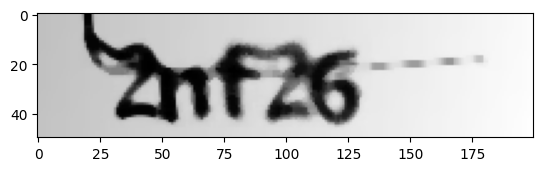

In [22]:
img_median = median_filter(
  os.path.join(IMAGES_DIR, 'FGSM_2nf26.png'),
  os.path.join(IMAGES_DIR, 'median_FGSM_2nf26.png')
)

print(example_rgb.shape, img_median.shape)
plt.imshow(img_median)